In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams['figure.figsize'] = [25, 15]

In [3]:
sys.path.insert(0, r'../src')
from function_cache import *

In [4]:
T_contracts_sequence = pd.read_csv('../data/processed/roll_period/T_contracts_sequence.csv', index_col=0)
TF_contracts_sequence = pd.read_csv('../data/processed/roll_period/TF_contracts_sequence.csv', index_col=0)

In [5]:
T_close_0min = pd.read_csv('../data/interim/raw_features/T/0min_before_close.csv', index_col=0, parse_dates=True)
TF_close_0min = pd.read_csv('../data/interim/raw_features/TF/0min_before_close.csv', index_col=0, parse_dates=True)
T_close_5min = pd.read_csv('../data/interim/raw_features/T/5min_before_close.csv', index_col=0, parse_dates=True)
TF_close_5min = pd.read_csv('../data/interim/raw_features/TF/5min_before_close.csv', index_col=0, parse_dates=True)
T_close_10min = pd.read_csv('../data/interim/raw_features/T/10min_before_close.csv', index_col=0, parse_dates=True)
TF_close_10min = pd.read_csv('../data/interim/raw_features/TF/10min_before_close.csv', index_col=0, parse_dates=True)
T_close_15min = pd.read_csv('../data/interim/raw_features/T/15min_before_close.csv', index_col=0, parse_dates=True)
TF_close_15min = pd.read_csv('../data/interim/raw_features/TF/15min_before_close.csv', index_col=0, parse_dates=True)
T_contract_list = list(T_close_0min.columns)
TF_contract_list = list(TF_close_0min.columns)

In [6]:
# start and end date of roll period
T_roll_period = pd.read_csv(
    "../data/processed/roll_period/T_roll_period.csv", index_col="contract"
).astype("datetime64[ns]")
TF_roll_period = pd.read_csv(
    "../data/processed/roll_period/TF_roll_period.csv", index_col="contract"
).astype("datetime64[ns]")

In [7]:
T_0min = get_value_df(T_contracts_sequence, T_close_0min, '0min', T_contract_list)
T_0min['spread_price'] = T_0min['active_contract_0min'] - T_0min['deferred_contract_0min']
TF_0min = get_value_df(TF_contracts_sequence, TF_close_0min, '0min', TF_contract_list)
TF_0min['spread_price'] = TF_0min['active_contract_0min'] - TF_0min['deferred_contract_0min']

In [8]:
T_5min = get_value_df(T_contracts_sequence, T_close_5min, '5min', T_contract_list)
T_5min['spread_price'] = T_5min['active_contract_5min'] - T_5min['deferred_contract_5min']
TF_5min = get_value_df(TF_contracts_sequence, TF_close_5min, '5min', TF_contract_list)
TF_5min['spread_price'] = TF_5min['active_contract_5min'] - TF_5min['deferred_contract_5min']

In [9]:
T_10min = get_value_df(T_contracts_sequence, T_close_10min, '10min', T_contract_list)
T_10min['spread_price'] = T_10min['active_contract_10min'] - T_10min['deferred_contract_10min']
TF_10min = get_value_df(TF_contracts_sequence, TF_close_10min, '10min', TF_contract_list)
TF_10min['spread_price'] = TF_10min['active_contract_10min'] - TF_10min['deferred_contract_10min']

In [10]:
T_15min = get_value_df(T_contracts_sequence, T_close_15min, '15min', T_contract_list)
T_15min['spread_price'] = T_15min['active_contract_15min'] - T_15min['deferred_contract_15min']
TF_15min = get_value_df(TF_contracts_sequence, TF_close_15min, '15min', TF_contract_list)
TF_15min['spread_price'] = TF_15min['active_contract_15min'] - TF_15min['deferred_contract_15min']

In [11]:
T_features = pd.read_csv('../data/processed/candidate_features/T_features.csv', index_col=0)
TF_features = pd.read_csv('../data/processed/candidate_features/TF_features.csv', index_col=0)

In [12]:
def spread_change_during_roll_asym(spread_price_start, spread_price_end, name, roll_period, contract_list):

    # roll period from the aspect of active contract
    roll_period_for_active = roll_period.shift(-1).dropna()
    roll_period_for_active["spread_change"] = np.nan

    for active_contract in roll_period_for_active.index:
        # the deferred contract is the next contract after active contract
        deferred_contract = find_next_contract(active_contract, contract_list)
        start_date = roll_period_for_active.loc[active_contract, "start"]
        end_date = roll_period_for_active.loc[active_contract, "end"]

        # spread change is the change of difference between acitve price and deferred price during the roll period
        spread_change = (spread_price_end.loc[end_date, "spread_price"] - spread_price_start.loc[start_date, "spread_price"])
        roll_period_for_active.loc[active_contract, "spread_change"] = spread_change
        
        result = pd.DataFrame(roll_period_for_active["spread_change"])
        result.columns = [name]
    return result

## T Spread Change Before Roll Period

### Multiple ys

,0min_0min,0min_5min,0min_10min,0min_15min,5min_0min,5min_5min,5min_10min,5min_15min,10min_0min,10min_5min,10min_10min,10min_15min,15min_0min,15min_5min,15min_10min,15min_15min,contract_code
contract,,,,,,,,,,,,,,,,,
T1509,0.555,0.550,0.575,0.565,0.620,0.615,0.640,0.630,0.58,0.575,0.600,0.59,0.575,0.570,0.595,0.585,0
T1512,0.500,0.500,0.535,0.540,0.455,0.455,0.490,0.495,0.38,0.380,0.415,0.42,0.455,0.455,0.490,0.495,1
T1603,0.300,0.295,0.255,0.260,0.290,0.285,0.245,0.250,0.30,0.295,0.255,0.26,0.265,0.260,0.220,0.225,2


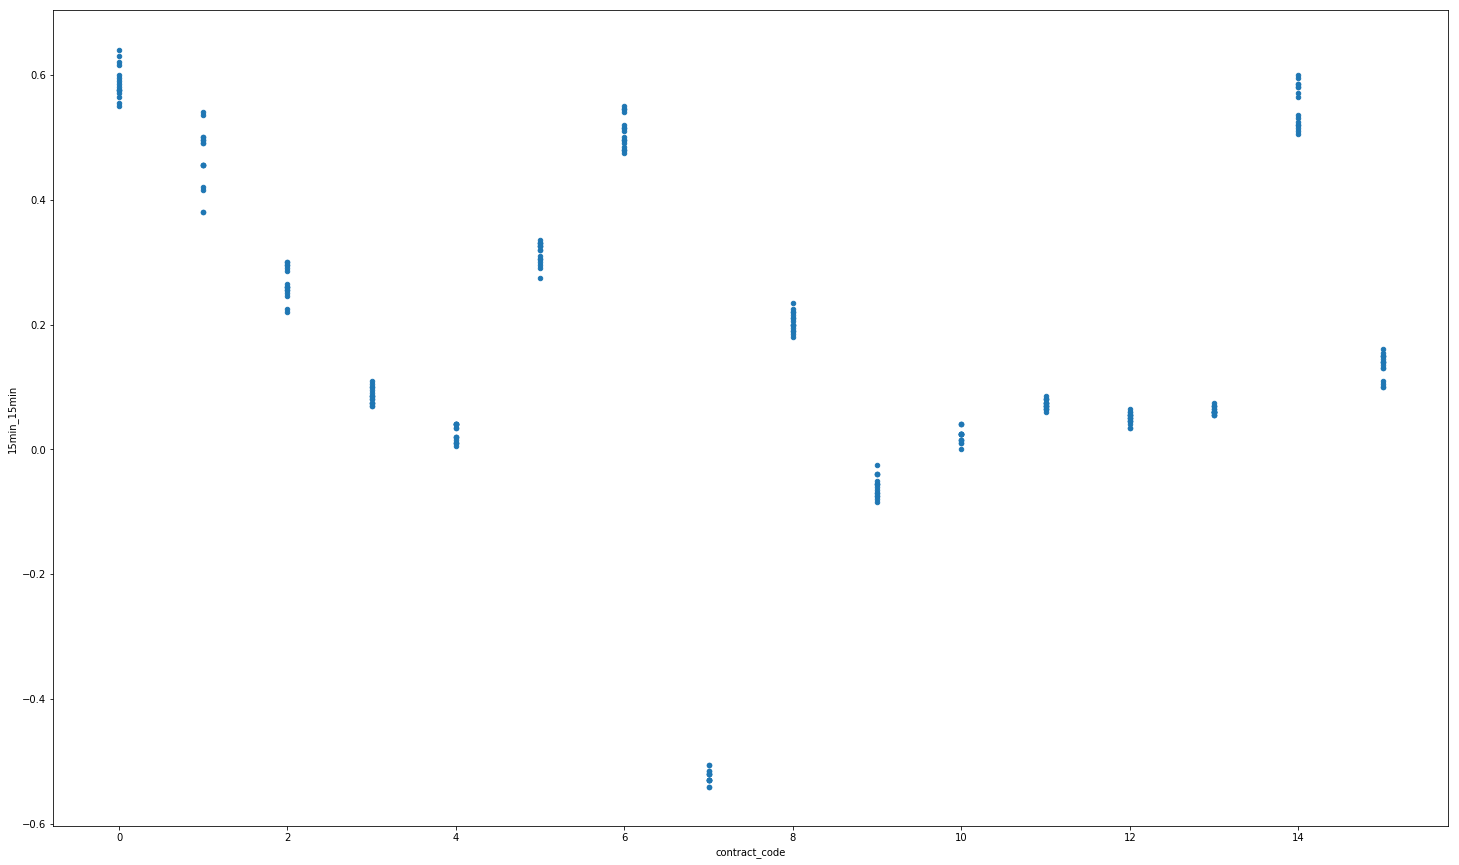

In [13]:

T_price_list = [T_0min, T_5min, T_10min, T_15min]
T_spread_change = pd.DataFrame()

for i, T_price_start in enumerate(T_price_list):
    for j, T_price_end in enumerate(T_price_list):
        
        name = str(5 * i) + 'min_' + str(5 * j) + 'min'
        spread_change = spread_change_during_roll_asym(T_price_start, T_price_end, name, T_roll_period, T_contract_list)
        T_spread_change = pd.concat([T_spread_change, spread_change], axis=1)

T_spread_change['contract_code'] = range(T_spread_change.shape[0])

ax1 = T_spread_change.plot.scatter(x='contract_code', y='0min_0min')
for name in T_spread_change.columns[1:-1]:
    ax2 = T_spread_change.plot.scatter(x='contract_code', y=name, ax=ax1)

T_spread_change.head(3)




### Lasso Regression

In [14]:
#alphas = [0.001, 0.002, 0.005, 0.01, 0.015, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
alphas = [0.075]

def lasso_choose_features(x, y, alphas):
    for alpha in alphas:
        lasso = Lasso(alpha=alpha, normalize=True, fit_intercept=False)
        lasso.fit(x, y)
        print(alpha, '-------', lasso.score(x, y))
        print(lasso.sparse_coef_)
        print()

for name in T_spread_change.columns[:-1]:
    print(name)
    lasso_choose_features(T_features.values, T_spread_change[name].values, alphas)
    print()


0min_0min
0.075 ------- 0.216760323743016
  (0, 4)	0.0033947623498413932
  (0, 24)	0.048726119636831704
  (0, 25)	-6.240118447505422e-05


0min_5min
0.075 ------- 0.20839343510823405
  (0, 4)	0.00339970445780328
  (0, 24)	0.04827977181076021
  (0, 25)	-6.045408153562792e-05


0min_10min
0.075 ------- 0.21789708727183288
  (0, 4)	0.0034560939632783077
  (0, 24)	0.05466163013677427
  (0, 25)	-6.452426408720826e-05


0min_15min
0.075 ------- 0.21112912575459497
  (0, 4)	0.003315690807912635
  (0, 24)	0.05060577445310092
  (0, 25)	-5.9992254224467606e-05


5min_0min
0.075 ------- 0.20190917553417098
  (0, 4)	0.003400281743034242
  (0, 24)	0.0392216377048073
  (0, 25)	-6.197735726073027e-05


5min_5min
0.075 ------- 0.19347911589215838
  (0, 4)	0.003405247438372887
  (0, 24)	0.038775994542282824
  (0, 25)	-6.0030996959145385e-05


5min_10min
0.075 ------- 0.20349719172194602
  (0, 4)	0.003461612799544164
  (0, 24)	0.045157131566776726
  (0, 25)	-6.4100419338291e-05


5min_15min
0.075 ------

In [38]:
T_features.iloc[:, 24].name

'1d_z_diff_act_volume_act_OI'

### T-score of the Chosen Feature

In [19]:
T_tscore = pd.DataFrame(index=['t_value', 'p_value'], columns=T_spread_change.columns[:-1])

for name in T_spread_change.columns[:-1]:
    
    print('name: ', name)
    x = T_features['10d_def_volume_exp_mva'].values.reshape(-1, 1)
    y = T_spread_change[name].values.reshape(-1, 1)
    
    est = sm.OLS(y, x)
    est2 = est.fit()
    
    print(est2.summary())
    print()
    
    T_tscore.loc['t_value', name] = est2.tvalues[0]
    T_tscore.loc['p_value', name] = est2.pvalues[0]
    print()

name:  0min_0min
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.019
Date:                Tue, 06 Aug 2019   Prob (F-statistic):              0.176
Time:                        16:57:53   Log-Likelihood:                -3.7686
No. Observations:                  16   AIC:                             9.537
Df Residuals:                      15   BIC:                             10.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.525e-05   2.48e-05   

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
D:\anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
D:\anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
D:\anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
D:\anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
D:\anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
D:\anaconda\lib\site-packages\scipy\stats\stat

In [21]:
print(T_tscore.T)
T_tscore_t = T_tscore.T.astype(float)

idx_list = [str(i*5)+'min' for i in range(4)]
T_pvalues = pd.DataFrame(T_tscore_t['p_value'].values.reshape(4, 4), index=idx_list, columns=idx_list)

T_pvalues.style.apply(background_gradient,
               cmap='PuBu',
               m=T_pvalues.min().min(),
               M=T_pvalues.max().max(),
               low=0,
               high=0.2)

             t_value   p_value
0min_0min    1.42093  0.175793
0min_5min    1.49329  0.156096
0min_10min   1.39088  0.184552
0min_15min   1.45029  0.167566
5min_0min    1.39375    0.1837
5min_5min    1.46782  0.162809
5min_10min   1.36446  0.192545
5min_15min   1.42352  0.175054
10min_0min   1.41378  0.177845
10min_5min    1.4902  0.156897
10min_10min  1.38411  0.186573
10min_15min  1.44978  0.167707
15min_0min   1.37233  0.190134
15min_5min   1.44607  0.168729
15min_10min  1.34186  0.199602
15min_15min  1.40311  0.180945


,0min,5min,10min,15min
0min,0.175793,0.156096,0.184552,0.167566
5min,0.1837,0.162809,0.192545,0.175054
10min,0.177845,0.156897,0.186573,0.167707
15min,0.190134,0.168729,0.199602,0.180945


### Regression for all Features

In [22]:
T_features_rep = T_features.copy()
T_features_rep = T_features_rep.append([T_features_rep]*15).sort_index()
T_features_rep.shape

plt.rcParams['figure.figsize'] = [5, 4]

x = T_features_rep.values
y = T_spread_change.iloc[:, :-1].values.reshape(-1, 1)

est = sm.OLS(y, x)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2688.
Date:                Tue, 06 Aug 2019   Prob (F-statistic):          9.37e-258
Time:                        16:58:50   Log-Likelihood:                 626.96
No. Observations:                 256   AIC:                            -1222.
Df Residuals:                     240   BIC:                            -1165.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1843      0.010    -18.664      0.0

### Chosen Feature and y

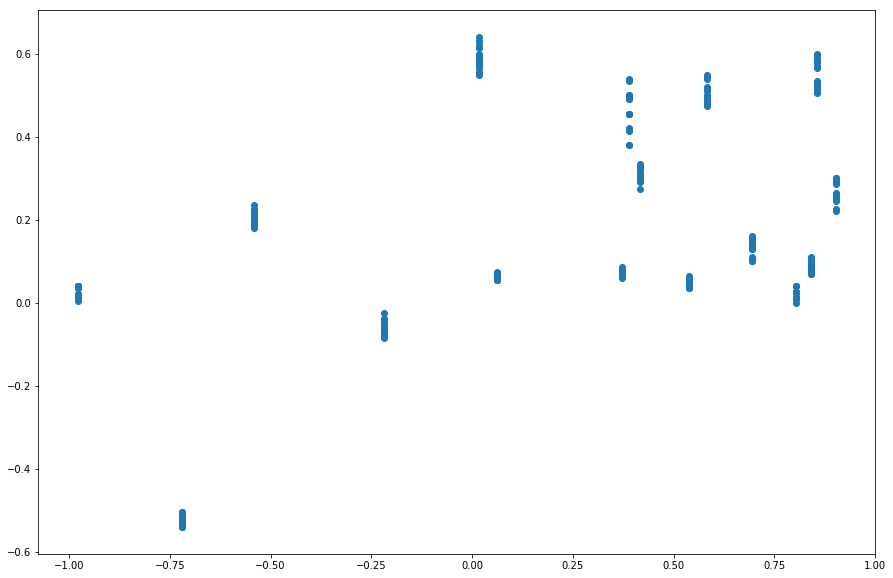

In [23]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.scatter(x=x[:,18], y=y)

## TF Spread Change Before Roll Period

### Multiple ys

,0min_0min,0min_5min,0min_10min,0min_15min,5min_0min,5min_5min,5min_10min,5min_15min,10min_0min,10min_5min,10min_10min,10min_15min,15min_0min,15min_5min,15min_10min,15min_15min,contract_code
contract,,,,,,,,,,,,,,,,,
TF1312,-0.032,-0.048,-0.034,-0.036,-0.052,-0.068,-0.054,-0.056,-0.050,-0.066,-0.052,-0.054,-0.016,-0.032,-0.018,-0.020,0
TF1403,-0.218,-0.204,-0.202,-0.202,-0.236,-0.222,-0.220,-0.220,-0.238,-0.224,-0.222,-0.222,-0.218,-0.204,-0.202,-0.202,1
TF1406,-0.156,-0.170,-0.206,-0.198,-0.144,-0.158,-0.194,-0.186,-0.150,-0.164,-0.200,-0.192,-0.146,-0.160,-0.196,-0.188,2


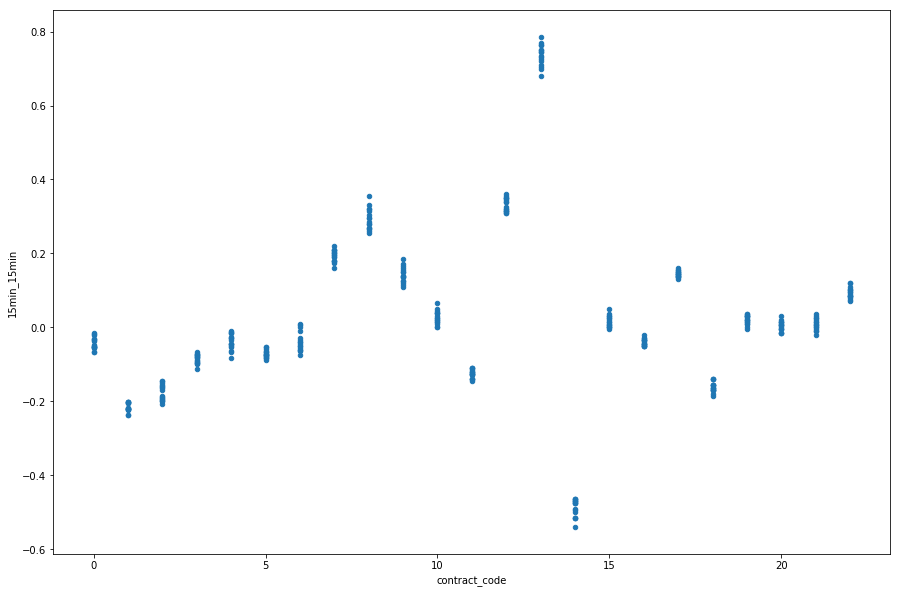

In [24]:
TF_price_list = [TF_0min, TF_5min, TF_10min, TF_15min]
TF_spread_change = pd.DataFrame()

for i, TF_price_start in enumerate(TF_price_list):
    for j, TF_price_end in enumerate(TF_price_list):
        
        name = str(5 * i) + 'min_' + str(5 * j) + 'min'
        spread_change = spread_change_during_roll_asym(TF_price_start, TF_price_end, name, TF_roll_period, TF_contract_list)
        TF_spread_change = pd.concat([TF_spread_change, spread_change], axis=1)

TF_spread_change['contract_code'] = range(TF_spread_change.shape[0])

ax1 = TF_spread_change.plot.scatter(x='contract_code', y='0min_0min')
for name in TF_spread_change.columns[1:-1]:
    ax2 = TF_spread_change.plot.scatter(x='contract_code', y=name, ax=ax1)

TF_spread_change.head(3)

### Lasso Regression

In [25]:
#alphas = [0.001, 0.002, 0.005, 0.01, 0.015, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
alphas = [0.075]

for name in TF_spread_change.columns[:-1]:
    print(name)
    lasso_choose_features(TF_features.values, TF_spread_change[name].values, alphas)
    print()

0min_0min
0.075 ------- 0.11224736417030078
  (0, 4)	-0.000636059235579542
  (0, 12)	0.003675612099233471
  (0, 25)	8.402241404482095e-05


0min_5min
0.075 ------- 0.0961990033132597
  (0, 4)	-0.0005991311007373847
  (0, 12)	0.003118683309559665
  (0, 25)	7.88102647352148e-05


0min_10min
0.075 ------- 0.10759202614266128
  (0, 4)	-0.0006582194447604891
  (0, 12)	0.003171469031637932
  (0, 20)	0.0010122469753301782
  (0, 25)	8.505291447730294e-05


0min_15min
0.075 ------- 0.1082442666682738
  (0, 4)	-0.0006624440146499247
  (0, 12)	0.0034233073012529384
  (0, 25)	7.88596835659076e-05


5min_0min
0.075 ------- 0.11796548628016236
  (0, 4)	-0.0005993163785337542
  (0, 12)	0.0033888259726104803
  (0, 20)	0.006195015139244929
  (0, 25)	8.603139952847102e-05


5min_5min
0.075 ------- 0.10200124378005382
  (0, 4)	-0.0005618971987195426
  (0, 12)	0.0028431448150915955
  (0, 20)	0.005529921497654695
  (0, 25)	8.052638793692504e-05


5min_10min
0.075 ------- 0.11870598892814876
  (0, 4)	-0.000

### T-score of the Chosen Feature

In [26]:
TF_tscore = pd.DataFrame(index=['t_value', 'p_value'], columns=TF_spread_change.columns[:-1])

for name in TF_spread_change.columns[:-1]:
    
    print('name: ', name)
    x = TF_features['10d_def_volume_exp_mva'].values.reshape(-1, 1)
    y = TF_spread_change[name].values.reshape(-1, 1)
    
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    print(est2.summary())
    print()
    
    TF_tscore.loc['t_value', name] = est2.tvalues[1]
    TF_tscore.loc['p_value', name] = est2.pvalues[1]
    print()

name:  0min_0min
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.219
Date:                Tue, 06 Aug 2019   Prob (F-statistic):              0.282
Time:                        16:59:36   Log-Likelihood:                 1.8637
No. Observations:                  23   AIC:                            0.2726
Df Residuals:                      21   BIC:                             2.544
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0591      0.089   

In [27]:
TF_tscore.T

,t_value,p_value
0min_0min,1.10406,0.282058
0min_5min,1.066,0.298529
0min_10min,1.14083,0.266786
0min_15min,1.08803,0.288914
5min_0min,1.0688,0.297294
5min_5min,1.03014,0.314661
5min_10min,1.10487,0.281714
5min_15min,1.0537,0.303995
10min_0min,1.06598,0.298534
10min_5min,1.02696,0.316124


In [28]:
TF_tscore_t = TF_tscore.T.astype(float)

idx_list = [str(i*5)+'min' for i in range(4)]
TF_pvalues = pd.DataFrame(TF_tscore_t['p_value'].values.reshape(4, 4), index=idx_list, columns=idx_list)

TF_pvalues.style.apply(background_gradient,
               cmap='PuBu',
               m=TF_pvalues.min().min(),
               M=TF_pvalues.max().max(),
               low=0,
               high=0.2)

,0min,5min,10min,15min
0min,0.282058,0.298529,0.266786,0.288914
5min,0.297294,0.314661,0.281714,0.303995
10min,0.298534,0.316124,0.283658,0.30637
15min,0.325097,0.342694,0.308804,0.333059


### Regression for all Features

In [29]:
TF_features_rep = TF_features.copy()
TF_features_rep = TF_features_rep.append([TF_features_rep]*15).sort_index()
TF_features_rep.shape

plt.rcParams['figure.figsize'] = [5, 4]

x = TF_features_rep.values
y = TF_spread_change.iloc[:, :-1].values.reshape(-1, 1)

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2733.
Date:                Tue, 06 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:59:49   Log-Likelihood:                 972.14
No. Observations:                 368   AIC:                            -1898.
Df Residuals:                     345   BIC:                            -1808.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1657      0.003     47.360      0.0

### Chosen Feature and y

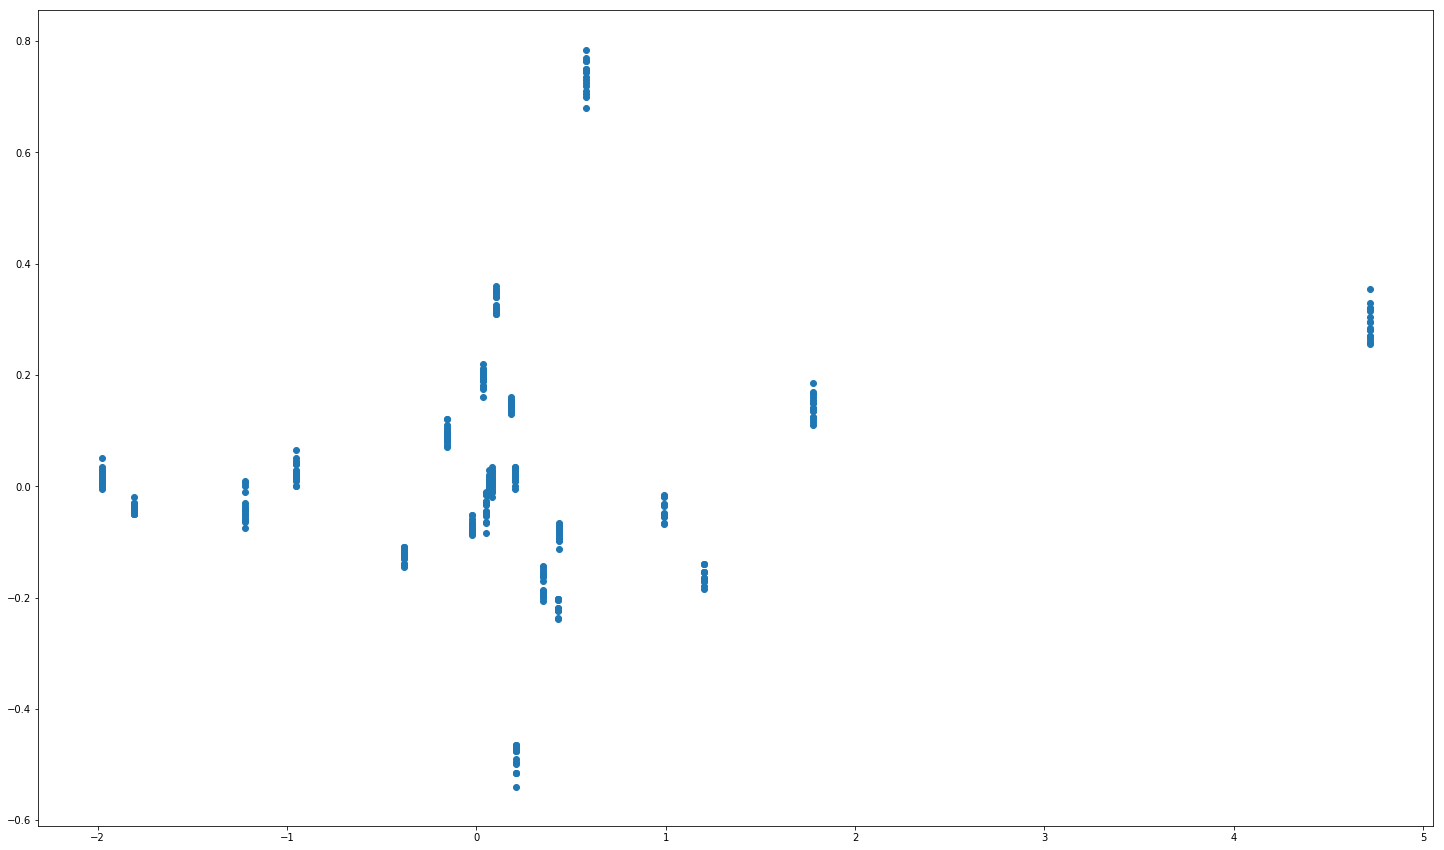

In [39]:
plt.rcParams['figure.figsize'] = [25, 15]

plt.scatter(x=x[:,24], y=y)